<span style=color:red>
1.임포트
    </span>

In [42]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [9]:
import os
os.chdir(r'C:\Users\PC\Desktop\data\235713_신용카드 사용자 연체 예측 AI 경진대회_data\open')

In [43]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [44]:
train.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


In [17]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [18]:
train.shape

(26457, 20)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [21]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [45]:
train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

<span style=color:red>
2. Binary variables
</span>

In [46]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


<AxesSubplot:>

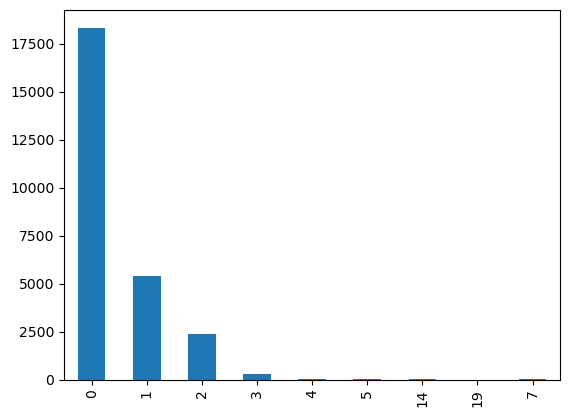

In [25]:
train['child_num'].value_counts(sort=False).plot.bar()

In [26]:
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num']>=2, 'child_num']=2

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

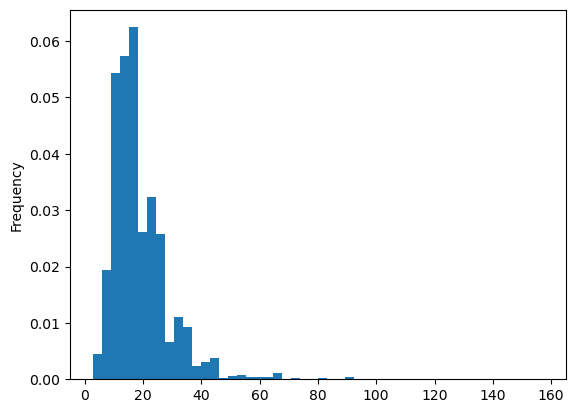

In [27]:
train['income_total'] = train['income_total'].astype(object)
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000
##############################################################3
print(train['income_total'].value_counts(bins=10,sort=False))
train['income_total'].plot(kind='hist',bins=50,density=True)

In [47]:
count, bin_dividers =np.histogram(train['income_total'], bins=7)
bin_names=['소득'+str(i) for i in range(7) ]
#bin_dividers는 train기준!!
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [41]:
test.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,-21990,365243,1,0,1,0,2.0,-60.0
1,26458,0,0,1,0,0,2,1,1,1,-18964,-8671,1,0,1,0,2.0,-36.0
2,26459,0,0,1,0,0,4,4,1,1,-15887,-217,1,1,1,0,2.0,-40.0


In [48]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [49]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

In [35]:
test.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,-21990,365243,1,0,1,0,2.0,-60.0
1,26458,0,0,1,0,0,2,1,1,1,-18964,-8671,1,0,1,0,2.0,-36.0
2,26459,0,0,1,0,0,4,4,1,1,-15887,-217,1,1,1,0,2.0,-40.0


In [51]:
train_x=train.drop('credit', axis=1)
train_x

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,0,0,0,0,0,0,0,1,1,2,-13899,-4709,1,0,0,0,2.0,-6.0
1,1,0,0,1,1,0,0,4,0,1,-11380,-1540,1,0,0,1,3.0,-5.0
2,2,1,1,1,0,1,4,1,1,1,-19087,-4434,1,0,1,0,2.0,-22.0
3,3,0,0,1,0,0,0,4,1,1,-15088,-2092,1,0,1,0,2.0,-37.0
4,4,0,1,1,0,0,2,1,1,1,-15037,-2105,1,0,0,0,2.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,-12079,-1984,1,0,0,0,4.0,-2.0
26453,26453,0,0,1,1,0,4,1,2,1,-15291,-2475,1,0,0,0,2.0,-47.0
26454,26454,0,1,0,0,1,4,4,0,5,-10082,-2015,1,0,0,0,2.0,-25.0
26455,26455,1,0,1,0,0,4,2,3,1,-10145,-107,1,0,0,0,1.0,-59.0


In [61]:
train_x2 = train_x.loc[:,["gender","car",'reality','edu_type','house_type','family_size','begin_month']]
train_y2 = train[['credit']]
train_x2
train_y2

,credit
0,1.0
1,1.0
2,2.0
3,0.0
4,2.0
...,...
26452,1.0
26453,2.0
26454,2.0
26455,2.0


In [62]:
test_y2 = test.loc[:,["gender","car",'reality','edu_type','house_type','family_size','begin_month']]
test_y2

,gender,car,reality,edu_type,house_type,family_size,begin_month
0,1,1,0,4,1,2.0,-60.0
1,0,0,1,1,1,2.0,-36.0
2,0,0,1,4,1,2.0,-40.0
3,1,1,0,4,1,2.0,-41.0
4,0,1,1,1,1,2.0,-8.0
...,...,...,...,...,...,...,...
9995,0,1,1,2,1,2.0,-19.0
9996,1,1,1,4,1,2.0,-34.0
9997,0,0,1,4,1,2.0,-55.0
9998,0,1,0,4,1,2.0,-33.0


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

clf=RandomForestClassifier()
clf.fit(train_x2, train_y2)
y_pred = clf.predict_proba(test_y2)
y_pred

array([[0.32834909, 0.        , 0.67165091],
       [0.        , 0.1729982 , 0.8270018 ],
       [0.11450858, 0.22419022, 0.66130119],
       ...,
       [0.09468745, 0.15355438, 0.75175817],
       [0.28192591, 0.        , 0.71807409],
       [0.        , 0.22396909, 0.77603091]])

In [69]:
submission.loc[:,1:] = y_pred
submission

,index,0,1,2
0,26457,0.328349,0.000000,0.671651
1,26458,0.000000,0.172998,0.827002
2,26459,0.114509,0.224190,0.661301
3,26460,0.149876,0.172018,0.678107
4,26461,0.168984,0.313055,0.517961
...,...,...,...,...
9995,36452,0.590964,0.045208,0.363827
9996,36453,0.197483,0.049834,0.752683
9997,36454,0.094687,0.153554,0.751758
9998,36455,0.281926,0.000000,0.718074


In [71]:
submission.to_csv('230304_submission.csv', index=False)